In [267]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import metrics

In [268]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [269]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [270]:
train.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [271]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [272]:
train.select_dtypes('object')

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,ID00001,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
1,ID00002,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
2,ID00003,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
3,ID00004,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,ID00005,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,C8,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
58588,ID58589,C14,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58589,ID58590,C5,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58590,ID58591,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [273]:
train = train.drop('policy_id', 1)
test = test.drop('policy_id', 1)

C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_16684\2281822312.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train = train.drop('policy_id', 1)
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_16684\2281822312.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test = test.drop('policy_id', 1)


In [274]:
train.select_dtypes('object').head()

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
1,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
2,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
3,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes


In [275]:
train['max_torque'] = train['max_torque'].apply(lambda x: x.split('@')[1][:-3])
train['max_power'] = train['max_power'].apply(lambda x: x.split('@')[1][:-3])
test['max_torque'] = test['max_torque'].apply(lambda x: x.split('@')[1][:-3])
test['max_power'] = test['max_power'].apply(lambda x: x.split('@')[1][:-3])

In [276]:
train['engine_type'].unique()

array(['F8D Petrol Engine', '1.2 L K12N Dualjet', '1.0 SCe',
       '1.5 L U2 CRDi', '1.5 Turbocharged Revotorq', 'K Series Dual jet',
       '1.2 L K Series Engine', 'K10C', 'i-DTEC', 'G12B',
       '1.5 Turbocharged Revotron'], dtype=object)

In [277]:
train_object = train.select_dtypes('object').columns
test_object = test.select_dtypes('object').columns

In [278]:
train[train_object]

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,C1,A,M1,CNG,3500,6000,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
1,C2,A,M1,CNG,3500,6000,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
2,C3,A,M1,CNG,3500,6000,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
3,C4,C1,M2,Petrol,4400,6000,1.2 L K12N Dualjet,Yes,Yes,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,C5,A,M3,Petrol,4250,5500,1.0 SCe,No,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,C8,A,M3,Petrol,4250,5500,1.0 SCe,No,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
58588,C14,A,M1,CNG,3500,6000,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58589,C5,A,M1,CNG,3500,6000,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58590,C8,B2,M6,Petrol,4400,6000,K Series Dual jet,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [279]:
train['max_torque'] = pd.to_numeric(train['max_torque'])
train['max_power'] = pd.to_numeric(train['max_power'])
test['max_torque'] = pd.to_numeric(test['max_torque'])
test['max_power'] = pd.to_numeric(test['max_power'])

In [280]:
train_object = train.select_dtypes('object').columns

In [281]:
train[train_object[:10]]

,area_cluster,segment,model,fuel_type,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera
0,C1,A,M1,CNG,F8D Petrol Engine,No,No,No,Yes,No
1,C2,A,M1,CNG,F8D Petrol Engine,No,No,No,Yes,No
2,C3,A,M1,CNG,F8D Petrol Engine,No,No,No,Yes,No
3,C4,C1,M2,Petrol,1.2 L K12N Dualjet,Yes,Yes,No,Yes,Yes
4,C5,A,M3,Petrol,1.0 SCe,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...
58587,C8,A,M3,Petrol,1.0 SCe,No,No,No,No,Yes
58588,C14,A,M1,CNG,F8D Petrol Engine,No,No,No,Yes,No
58589,C5,A,M1,CNG,F8D Petrol Engine,No,No,No,Yes,No
58590,C8,B2,M6,Petrol,K Series Dual jet,No,Yes,No,Yes,No


In [282]:
train[train_object[10:20]]

,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking
0,Drum,Manual,Power,No,No,No,No,No,No,No
1,Drum,Manual,Power,No,No,No,No,No,No,No
2,Drum,Manual,Power,No,No,No,No,No,No,No
3,Drum,Automatic,Electric,Yes,No,No,Yes,Yes,Yes,Yes
4,Drum,Automatic,Electric,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
58587,Drum,Automatic,Electric,No,No,No,No,No,Yes,Yes
58588,Drum,Manual,Power,No,No,No,No,No,No,No
58589,Drum,Manual,Power,No,No,No,No,No,No,No
58590,Drum,Manual,Electric,Yes,No,No,No,Yes,Yes,Yes


In [283]:
train[train_object[20:30]]

,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,Yes,No,No,No,Yes
1,Yes,No,No,No,Yes
2,Yes,No,No,No,Yes
3,Yes,Yes,Yes,Yes,Yes
4,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...
58587,Yes,No,Yes,Yes,Yes
58588,Yes,No,No,No,Yes
58589,Yes,No,No,No,Yes
58590,Yes,Yes,Yes,Yes,Yes


In [284]:
train['area_cluster'].unique()

array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22'], dtype=object)

In [285]:
train['segment'].unique()

array(['A', 'C1', 'C2', 'B2', 'B1', 'Utility'], dtype=object)

In [286]:
train['model'].unique()

array(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11'],
      dtype=object)

In [287]:
train['fuel_type'].unique()

array(['CNG', 'Petrol', 'Diesel'], dtype=object)

In [288]:
train.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,3500,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,3500,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,3500,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,4400,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,4250,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [289]:
enco = LabelEncoder()

for i in train.select_dtypes('object'):
    train[i] = enco.fit_transform(train[i])

for i in test.select_dtypes('object'):
    test[i] = enco.fit_transform(test[i])

c:\Users\X1 Yoga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_claim', ylabel='count'>

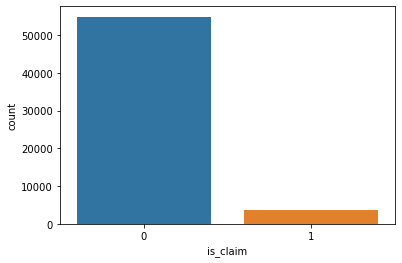

In [290]:
sns.countplot(train['is_claim'])

In [291]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  int32  
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  int32  
 7   model                             58592 non-null  int32  
 8   fuel_type                         58592 non-null  int32  
 9   max_torque                        58592 non-null  int64  
 10  max_power                         58592 non-null  int64  
 11  engine_type                       58592 non-null  int32  
 12  airb

In [292]:
y = train['is_claim']
X = train.drop('is_claim', 1)
dro_var = ['max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_tpms', 'turning_radius', 'gross_weight', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_power_steering',
       'ncap_rating']
X.drop(X[dro_var],1, inplace = True)
test.drop(test[dro_var], 1, inplace = True)

C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_16684\290287255.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train.drop('is_claim', 1)
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_16684\290287255.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X.drop(X[dro_var],1, inplace = True)
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_16684\290287255.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test.drop(test[dro_var], 1, inplace = True)


<AxesSubplot:>

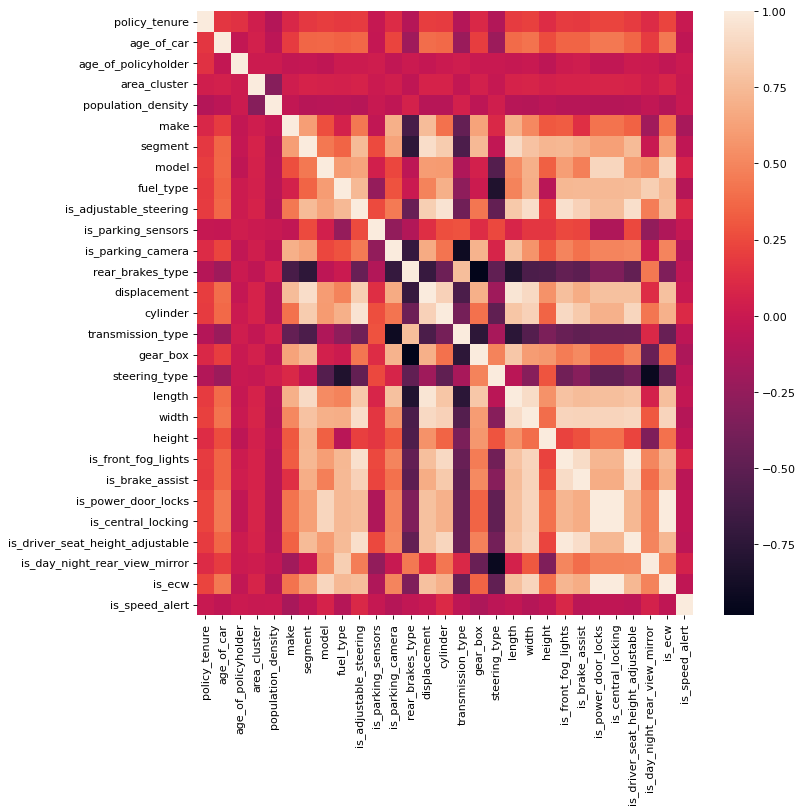

In [293]:
plt.figure(figsize=(10, 10), dpi=80)
sns.heatmap(X.corr())

In [294]:
corr = train.corr()
claim_corr = corr['is_claim']

In [295]:
claim_corr[(claim_corr<-0.005)].index

Index(['age_of_car', 'population_density', 'steering_type'], dtype='object')

In [296]:
claim_corr

policy_tenure                       0.078747
age_of_car                         -0.028172
age_of_policyholder                 0.022435
area_cluster                        0.009425
population_density                 -0.017808
make                               -0.000456
segment                             0.006366
model                               0.006548
fuel_type                           0.009612
max_torque                          0.004781
max_power                           0.000095
engine_type                         0.000927
airbags                             0.002789
is_esc                              0.002995
is_adjustable_steering              0.013917
is_tpms                             0.000703
is_parking_sensors                  0.008419
is_parking_camera                  -0.000871
rear_brakes_type                   -0.000703
displacement                        0.007678
cylinder                            0.013434
transmission_type                  -0.000637
gear_box  

In [297]:
Rand = RandomForestClassifier()
Rand.fit(X,y)

RandomForestClassifier()

In [298]:
y_pred = Rand.predict(test)

In [299]:
Rand.score(X,y)

0.9998634625887494

In [300]:
f1_score(y, y, average='binary')

1.0

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [302]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,y_train)

predicted= model.predict(X_test) 
f1_score(y_test, predicted)

0.015819209039548022

In [303]:
Rand.fit(X_train, y_train)

RandomForestClassifier()

In [304]:
pred = Rand.predict(X_test)
Rand.score(X_train, y_train)


0.9998293260512449

In [305]:
f1_score(y_test, pred)

0.010230179028132993

In [306]:
rand_pred = Rand.predict(test)

In [307]:
test1 = pd.read_csv('test.csv')

In [308]:
ID = test1['policy_id']
data = {'policy_id':ID, 'is_claim' : rand_pred}

In [309]:
df = pd.DataFrame(data)

In [310]:
df.to_csv('rand_pred1')

In [311]:
kn_pred = model.predict(test)

In [312]:
data = {'policy_id':ID, 'is_claim' : kn_pred}
df = pd.DataFrame(data)
df.to_csv('kn_pred.csv', index = False)

In [319]:
xmodel = xgb.XGBClassifier()
xmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [320]:
predicted_y = model.predict(X_test)

In [321]:
print(metrics.classification_report(y_test, predicted_y))
print(metrics.confusion_matrix(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     11003
           1       0.04      0.01      0.02       716

    accuracy                           0.93     11719
   macro avg       0.49      0.50      0.49     11719
weighted avg       0.88      0.93      0.90     11719

[[10841   162]
 [  709     7]]


In [325]:
xm_pred = xmodel.predict(test)

In [326]:
data = {'policy_id':ID, 'is_claim' : xm_pred}
df = pd.DataFrame(data)
df.to_csv('xm_pred.csv', index = False)